In [1]:
## https://medium.com/@jan_5421/extracting-financial-statements-from-sec-filings-xbrl-to-json-f83542ade90

In [2]:
import requests
import json
import pandas as pd
import datetime
#import date

In [3]:
# 10-Q filing URL of Apple
filing_url = "https://www.sec.gov/Archives/edgar/data/320193/000032019321000056/aapl-20210327.htm"

# XBRL-to-JSON converter API endpoint
xbrl_converter_api_endpoint = "https://api.sec-api.io/xbrl-to-json"

# get your API key at https://sec-api.io
api_key = "4e000ac0b4ca2a20706e1bbe165412ea6cb68984df8768a6f4f52c2938171689"

final_url = xbrl_converter_api_endpoint + "?htm-url=" + filing_url + "&token=" + api_key

# make request to the API
response = requests.get(final_url)

# load JSON into memory
xbrl_json = json.loads(response.text)

# income statement example
print(xbrl_json['StatementsOfIncome'])


# convert XBRL-JSON of income statement to pandas dataframe

{'RevenueFromContractWithCustomerExcludingAssessedTax': [{'decimals': '-6', 'unitRef': 'usd', 'period': {'startDate': '2020-12-27', 'endDate': '2021-03-27'}, 'segment': {'dimension': 'srt:ProductOrServiceAxis', 'value': 'us-gaap:ProductMember'}, 'value': '72683000000'}, {'decimals': '-6', 'unitRef': 'usd', 'period': {'startDate': '2019-12-29', 'endDate': '2020-03-28'}, 'segment': {'dimension': 'srt:ProductOrServiceAxis', 'value': 'us-gaap:ProductMember'}, 'value': '44965000000'}, {'decimals': '-6', 'unitRef': 'usd', 'period': {'startDate': '2020-09-27', 'endDate': '2021-03-27'}, 'segment': {'dimension': 'srt:ProductOrServiceAxis', 'value': 'us-gaap:ProductMember'}, 'value': '168361000000'}, {'decimals': '-6', 'unitRef': 'usd', 'period': {'startDate': '2019-09-29', 'endDate': '2020-03-28'}, 'segment': {'dimension': 'srt:ProductOrServiceAxis', 'value': 'us-gaap:ProductMember'}, 'value': '124069000000'}, {'decimals': '-6', 'unitRef': 'usd', 'period': {'startDate': '2020-12-27', 'endDate':

In [4]:
def get_income_statement(xbrl_json):
    income_statement_store = {}

    # iterate over each US GAAP item in the income statement
    for usGaapItem in xbrl_json['StatementsOfIncome']:
        values = []
        indicies = []

        for fact in xbrl_json['StatementsOfIncome'][usGaapItem]:
            # only consider items without segment. not required for our analysis.
            if 'segment' not in fact:
                index = fact['period']['startDate'] + '-' + fact['period']['endDate']
                # ensure no index duplicates are created
                if index not in indicies:
                    values.append(fact['value'])
                    indicies.append(index)                    

        income_statement_store[usGaapItem] = pd.Series(values, index=indicies) 

    income_statement = pd.DataFrame(income_statement_store)
    # switch columns and rows so that US GAAP items are rows and each column header represents a date range
    return income_statement.T 

In [5]:
income_statement = get_income_statement(xbrl_json)

income_statement

,2020-12-27-2021-03-27,2019-12-29-2020-03-28,2020-09-27-2021-03-27,2019-09-29-2020-03-28
RevenueFromContractWithCustomerExcludingAssessedTax,89584000000,58313000000,201023000000,150132000000
CostOfGoodsAndServicesSold,51505000000,35943000000,118616000000,92545000000
GrossProfit,38079000000,22370000000,82407000000,57587000000
ResearchAndDevelopmentExpense,5262000000,4565000000,10425000000,9016000000
SellingGeneralAndAdministrativeExpense,5314000000,4952000000,10945000000,10149000000
OperatingExpenses,10576000000,9517000000,21370000000,19165000000
OperatingIncomeLoss,27503000000,12853000000,61037000000,38422000000
NonoperatingIncomeExpense,508000000,282000000,553000000,631000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,28011000000,13135000000,61590000000,39053000000
IncomeTaxExpenseBenefit,4381000000,1886000000,9205000000,5568000000


In [6]:
# convert XBRL-JSON of balance sheet to pandas dataframe
def get_balance_sheet(xbrl_json):
    balance_sheet_store = {}

    for usGaapItem in xbrl_json['BalanceSheets']:
        values = []
        indicies = []

        for fact in xbrl_json['BalanceSheets'][usGaapItem]:
            # only consider items without segment.
            if 'segment' not in fact:
                index = fact['period']['instant']

                # avoid duplicate indicies with same values
                if index in indicies:
                    continue
                    
                # add 0 if value is nil
                if "value" not in fact:
                    values.append(0)
                else:
                    values.append(fact['value'])

                indicies.append(index)                    

            balance_sheet_store[usGaapItem] = pd.Series(values, index=indicies) 

    balance_sheet = pd.DataFrame(balance_sheet_store)
    # switch columns and rows so that US GAAP items are rows and each column header represents a date instant
    return balance_sheet.T

balance_sheet = get_balance_sheet(xbrl_json)
balance_sheet

,2019-09-28,2019-12-28,2020-03-28,2020-09-26,2020-12-26,2021-03-27
CashAndCashEquivalentsAtCarryingValue,NaN,NaN,NaN,38016000000,NaN,38466000000
MarketableSecuritiesCurrent,NaN,NaN,NaN,52927000000,NaN,31368000000
AccountsReceivableNetCurrent,NaN,NaN,NaN,16120000000,NaN,18503000000
InventoryNet,NaN,NaN,NaN,4061000000,NaN,5219000000
NontradeReceivablesCurrent,NaN,NaN,NaN,21325000000,NaN,14533000000
OtherAssetsCurrent,NaN,NaN,NaN,11264000000,NaN,13376000000
AssetsCurrent,NaN,NaN,NaN,143713000000,NaN,121465000000
MarketableSecuritiesNoncurrent,NaN,NaN,NaN,100887000000,NaN,134539000000
PropertyPlantAndEquipmentNet,NaN,NaN,NaN,36766000000,NaN,37815000000
OtherAssetsNoncurrent,NaN,NaN,NaN,42522000000,NaN,43339000000


In [7]:
def get_cash_flow_statement(xbrl_json):
    cash_flows_store = {}

    for usGaapItem in xbrl_json['StatementsOfCashFlows']:
        values = []
        indicies = []

        for fact in xbrl_json['StatementsOfCashFlows'][usGaapItem]:        
            # only consider items without segment.
            if 'segment' not in fact:
                # check if date instant or date range is present
                if "instant" in fact['period']:
                    index = fact['period']['instant']
                else:
                    index = fact['period']['startDate'] + '-' + fact['period']['endDate']

                # avoid duplicate indicies with same values
                if index in indicies:
                    continue

                if "value" not in fact:
                    values.append(0)
                else:
                    values.append(fact['value'])

                indicies.append(index)                    

        cash_flows_store[usGaapItem] = pd.Series(values, index=indicies) 


    cash_flows = pd.DataFrame(cash_flows_store)
    return cash_flows.T
    
cash_flows = get_cash_flow_statement(xbrl_json)
cash_flows

,2019-09-28,2019-09-29-2020-03-28,2019-12-29-2020-03-28,2020-03-28,2020-09-26,2020-09-27-2021-03-27,2020-12-27-2021-03-27,2021-03-27
CashCashEquivalentsRestrictedCashAndRestrictedCashEquivalents,50224000000,NaN,NaN,43049000000,39789000000,NaN,NaN,40006000000
NetIncomeLoss,NaN,33485000000,11249000000,NaN,NaN,52385000000,23630000000,NaN
DepreciationDepletionAndAmortization,NaN,5602000000,NaN,NaN,NaN,5463000000,NaN,NaN
ShareBasedCompensation,NaN,3407000000,NaN,NaN,NaN,4001000000,NaN,NaN
DeferredIncomeTaxExpenseBenefit,NaN,-651000000,NaN,NaN,NaN,-207000000,NaN,NaN
OtherNoncashIncomeExpense,NaN,259000000,NaN,NaN,NaN,474000000,NaN,NaN
IncreaseDecreaseInAccountsReceivable,NaN,-7284000000,NaN,NaN,NaN,2347000000,NaN,NaN
IncreaseDecreaseInInventories,NaN,-699000000,NaN,NaN,NaN,1226000000,NaN,NaN
IncreaseDecreaseInOtherReceivables,NaN,-7923000000,NaN,NaN,NaN,-6792000000,NaN,NaN
IncreaseDecreaseInOtherOperatingAssets,NaN,8866000000,NaN,NaN,NaN,4333000000,NaN,NaN


In [8]:
from sec_api import QueryApi

# get your API key at https://sec-api.io
query_api = QueryApi(api_key=api_key)

# fetch all 10-Q and 10-K filings for Apple
query = {
    "query": {
        "query_string": {
            "query": "(formType:\"10-Q\" OR formType:\"10-K\") AND ticker:AAPL"
        }
    },
    "from": "0",
    "size": "20",
    "sort": [{ "filedAt": { "order": "desc" } }]
}

query_result = query_api.get_filings(query)

In [9]:
accession_numbers = []

# extract accession numbers of each filing
for filing in query_result['filings']:
    accession_numbers.append(filing['accessionNo']);
    
"""
accession_numbers: 
['0000320193-21-000056',
 '0000320193-21-000010',
 '0000320193-20-000096',
 '0000320193-20-000062',
 '0000320193-20-000052',
 '0000320193-20-000010',
 '0000320193-19-000119',
 '0000320193-19-000076',
 '0000320193-19-000066',
 '0000320193-19-000010',
 '0000320193-18-000145',
 '0000320193-18-000100',
 '0000320193-18-000070',
 '0000320193-18-000007',
 '0000320193-17-000070',
 '0000320193-17-000009',
 '0001628280-17-004790',
 '0001628280-17-000717',
 '0001628280-16-020309',
 '0001628280-16-017809']
"""

"\naccession_numbers: \n['0000320193-21-000056',\n '0000320193-21-000010',\n '0000320193-20-000096',\n '0000320193-20-000062',\n '0000320193-20-000052',\n '0000320193-20-000010',\n '0000320193-19-000119',\n '0000320193-19-000076',\n '0000320193-19-000066',\n '0000320193-19-000010',\n '0000320193-18-000145',\n '0000320193-18-000100',\n '0000320193-18-000070',\n '0000320193-18-000007',\n '0000320193-17-000070',\n '0000320193-17-000009',\n '0001628280-17-004790',\n '0001628280-17-000717',\n '0001628280-16-020309',\n '0001628280-16-017809']\n"

In [10]:
# get XBRL-JSON for a given accession number
def get_xbrl_json(accession_no):
    request_url = xbrl_converter_api_endpoint + "?accession-no=" + accession_no + "&token=" + api_key

    response_tmp = requests.get(request_url)

    return json.loads(response_tmp.text)

In [18]:
# merge two income statements into one statement.
# row indicies of both statements have to be the same
# statement_b represents the most recent statement.
def merge_income_statements(statement_a, statement_b):
    return statement_a.merge(statement_b,
                     how="outer", 
                     #on=income_statement.index, 
                     left_index=True,
                     right_index = True,
                     suffixes=('_left', '')
                            )

In [19]:
# clean income statement.
# drop duplicate columns (= column name ends with "_left"), drop key_0 column, drop columns with +5 NaNs
def clean_income_statement(statement):
    for column in statement:

        # column has more than 5 NaN values
        is_nan_column = statement[column].isna().sum() > 5

        if column.endswith('_left') or column == 'key_0' or is_nan_column:
            statement = statement.drop(column, axis=1)
        
        #statement.columns.replace("_x","")
        #statement.columns.replace("_y","")
            
    
    # rearrange columns so that first column represents first quarter
    # e.g. 2018, 2019, 2020 - and not 2020, 2019, 2018
    sorted_columns = sorted(statement.columns.values)
    
    return statement[sorted_columns]

In [20]:
# helps printing dataframes while we generate new income statement
from IPython.display import display, HTML

previous_income_statement_set = False
income_statement_final = None

for accession_no in accession_numbers[0:9]:
# for accession_no in accession_numbers: # doesn't work with filings filed before 2017 - indicies not equal
    #print(accession_no)
    
    # get XBRL-JSON of 10-Q or 10-K filing by accession number
    xbrl_json_data = get_xbrl_json(accession_no)
    
    # convert XBRL-JSON to a pandas dataframe
    income_statement_uncleaned = get_income_statement(xbrl_json_data)

    # clean the income statement
    income_statement_cleaned = clean_income_statement(income_statement_uncleaned)
    
    # print income statement on each iteration to monitor progress
    display(HTML(income_statement_cleaned.to_html()))
    
    # merge new income statement with previously generated income statement
    if previous_income_statement_set:
        income_statement_final = clean_income_statement(merge_income_statements(income_statement_final, income_statement_cleaned))
    else:
        income_statement_final = income_statement_cleaned
        previous_income_statement_set = True

,2019-09-29-2020-06-27,2020-03-29-2020-06-27,2020-09-27-2021-06-26,2021-03-28-2021-06-26
RevenueFromContractWithCustomerExcludingAssessedTax,209817000000,59685000000,282457000000,81434000000
CostOfGoodsAndServicesSold,129550000000,37005000000,164795000000,46179000000
GrossProfit,80267000000,22680000000,117662000000,35255000000
ResearchAndDevelopmentExpense,13774000000,4758000000,16142000000,5717000000
SellingGeneralAndAdministrativeExpense,14980000000,4831000000,16357000000,5412000000
OperatingExpenses,28754000000,9589000000,32499000000,11129000000
OperatingIncomeLoss,51513000000,13091000000,85163000000,24126000000
NonoperatingIncomeExpense,677000000,46000000,796000000,243000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,52190000000,13137000000,85959000000,24369000000
IncomeTaxExpenseBenefit,7452000000,1884000000,11830000000,2625000000


,2019-09-29-2020-03-28,2019-12-29-2020-03-28,2020-09-27-2021-03-27,2020-12-27-2021-03-27
RevenueFromContractWithCustomerExcludingAssessedTax,150132000000,58313000000,201023000000,89584000000
CostOfGoodsAndServicesSold,92545000000,35943000000,118616000000,51505000000
GrossProfit,57587000000,22370000000,82407000000,38079000000
ResearchAndDevelopmentExpense,9016000000,4565000000,10425000000,5262000000
SellingGeneralAndAdministrativeExpense,10149000000,4952000000,10945000000,5314000000
OperatingExpenses,19165000000,9517000000,21370000000,10576000000
OperatingIncomeLoss,38422000000,12853000000,61037000000,27503000000
NonoperatingIncomeExpense,631000000,282000000,553000000,508000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,39053000000,13135000000,61590000000,28011000000
IncomeTaxExpenseBenefit,5568000000,1886000000,9205000000,4381000000


,2019-09-29-2019-12-28,2020-09-27-2020-12-26
RevenueFromContractWithCustomerExcludingAssessedTax,91819000000,111439000000
CostOfGoodsAndServicesSold,56602000000,67111000000
GrossProfit,35217000000,44328000000
ResearchAndDevelopmentExpense,4451000000,5163000000
SellingGeneralAndAdministrativeExpense,5197000000,5631000000
OperatingExpenses,9648000000,10794000000
OperatingIncomeLoss,25569000000,33534000000
NonoperatingIncomeExpense,349000000,45000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,25918000000,33579000000
IncomeTaxExpenseBenefit,3682000000,4824000000


,2017-10-01-2018-09-29,2018-09-30-2019-09-28,2019-09-29-2020-09-26
RevenueFromContractWithCustomerExcludingAssessedTax,265595000000,260174000000,274515000000
CostOfGoodsAndServicesSold,163756000000,161782000000,169559000000
GrossProfit,101839000000,98392000000,104956000000
ResearchAndDevelopmentExpense,14236000000,16217000000,18752000000
SellingGeneralAndAdministrativeExpense,16705000000,18245000000,19916000000
OperatingExpenses,30941000000,34462000000,38668000000
OperatingIncomeLoss,70898000000,63930000000,66288000000
NonoperatingIncomeExpense,2005000000,1807000000,803000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,72903000000,65737000000,67091000000
IncomeTaxExpenseBenefit,13372000000,10481000000,9680000000


,2018-09-30-2019-06-29,2019-03-31-2019-06-29,2019-09-29-2020-06-27,2020-03-29-2020-06-27
RevenueFromContractWithCustomerExcludingAssessedTax,196134000000,53809000000,209817000000,59685000000
CostOfGoodsAndServicesSold,122055000000,33582000000,129550000000,37005000000
GrossProfit,74079000000,20227000000,80267000000,22680000000
ResearchAndDevelopmentExpense,12107000000,4257000000,13774000000,4758000000
SellingGeneralAndAdministrativeExpense,13667000000,4426000000,14980000000,4831000000
OperatingExpenses,25774000000,8683000000,28754000000,9589000000
OperatingIncomeLoss,48305000000,11544000000,51513000000,13091000000
NonoperatingIncomeExpense,1305000000,367000000,677000000,46000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,49610000000,11911000000,52190000000,13137000000
IncomeTaxExpenseBenefit,8040000000,1867000000,7452000000,1884000000


,2018-09-30-2019-03-30,2018-12-30-2019-03-30,2019-09-29-2020-03-28,2019-12-29-2020-03-28
RevenueFromContractWithCustomerExcludingAssessedTax,142325000000,58015000000,150132000000,58313000000
CostOfGoodsAndServicesSold,88473000000,36194000000,92545000000,35943000000
GrossProfit,53852000000,21821000000,57587000000,22370000000
ResearchAndDevelopmentExpense,7850000000,3948000000,9016000000,4565000000
SellingGeneralAndAdministrativeExpense,9241000000,4458000000,10149000000,4952000000
OperatingExpenses,17091000000,8406000000,19165000000,9517000000
OperatingIncomeLoss,36761000000,13415000000,38422000000,12853000000
NonoperatingIncomeExpense,938000000,378000000,631000000,282000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,37699000000,13793000000,39053000000,13135000000
IncomeTaxExpenseBenefit,6173000000,2232000000,5568000000,1886000000


,2018-09-30-2018-12-29,2019-09-29-2019-12-28
RevenueFromContractWithCustomerExcludingAssessedTax,84310000000,91819000000
CostOfGoodsAndServicesSold,52279000000,56602000000
GrossProfit,32031000000,35217000000
ResearchAndDevelopmentExpense,3902000000,4451000000
SellingGeneralAndAdministrativeExpense,4783000000,5197000000
OperatingExpenses,8685000000,9648000000
OperatingIncomeLoss,23346000000,25569000000
NonoperatingIncomeExpense,560000000,349000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,23906000000,25918000000
IncomeTaxExpenseBenefit,3941000000,3682000000


,2016-09-25-2017-09-30,2017-10-01-2018-09-29,2018-09-30-2019-09-28
RevenueFromContractWithCustomerExcludingAssessedTax,229234000000,265595000000,260174000000
CostOfGoodsAndServicesSold,141048000000,163756000000,161782000000
GrossProfit,88186000000,101839000000,98392000000
ResearchAndDevelopmentExpense,11581000000,14236000000,16217000000
SellingGeneralAndAdministrativeExpense,15261000000,16705000000,18245000000
OperatingExpenses,26842000000,30941000000,34462000000
OperatingIncomeLoss,61344000000,70898000000,63930000000
NonoperatingIncomeExpense,2745000000,2005000000,1807000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,64089000000,72903000000,65737000000
IncomeTaxExpenseBenefit,15738000000,13372000000,10481000000


,2017-10-01-2018-06-30,2018-04-01-2018-06-30,2018-09-30-2019-06-29,2019-03-31-2019-06-29
RevenueFromContractWithCustomerExcludingAssessedTax,202695000000,53265000000,196134000000,53809000000
CostOfGoodsAndServicesSold,124940000000,32844000000,122055000000,33582000000
GrossProfit,77755000000,20421000000,74079000000,20227000000
ResearchAndDevelopmentExpense,10486000000,3701000000,12107000000,4257000000
SellingGeneralAndAdministrativeExpense,12489000000,4108000000,13667000000,4426000000
OperatingExpenses,22975000000,7809000000,25774000000,8683000000
OperatingIncomeLoss,54780000000,12612000000,48305000000,11544000000
NonoperatingIncomeExpense,1702000000,672000000,1305000000,367000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,56482000000,13284000000,49610000000,11911000000
IncomeTaxExpenseBenefit,11076000000,1765000000,8040000000,1867000000


In [21]:
income_statement_final

,2016-09-25-2017-09-30,2017-10-01-2018-06-30,2017-10-01-2018-09-29,2018-04-01-2018-06-30,2018-09-30-2018-12-29,2018-09-30-2019-03-30,2018-09-30-2019-06-29,2018-09-30-2019-09-28,2018-12-30-2019-03-30,2019-03-31-2019-06-29,...,2019-09-29-2020-03-28,2019-09-29-2020-06-27,2019-09-29-2020-09-26,2019-12-29-2020-03-28,2020-03-29-2020-06-27,2020-09-27-2020-12-26,2020-09-27-2021-03-27,2020-09-27-2021-06-26,2020-12-27-2021-03-27,2021-03-28-2021-06-26
RevenueFromContractWithCustomerExcludingAssessedTax,229234000000,202695000000,265595000000,53265000000,84310000000,142325000000,196134000000,260174000000,58015000000,53809000000,...,150132000000,209817000000,274515000000,58313000000,59685000000,111439000000,201023000000,282457000000,89584000000,81434000000
CostOfGoodsAndServicesSold,141048000000,124940000000,163756000000,32844000000,52279000000,88473000000,122055000000,161782000000,36194000000,33582000000,...,92545000000,129550000000,169559000000,35943000000,37005000000,67111000000,118616000000,164795000000,51505000000,46179000000
GrossProfit,88186000000,77755000000,101839000000,20421000000,32031000000,53852000000,74079000000,98392000000,21821000000,20227000000,...,57587000000,80267000000,104956000000,22370000000,22680000000,44328000000,82407000000,117662000000,38079000000,35255000000
ResearchAndDevelopmentExpense,11581000000,10486000000,14236000000,3701000000,3902000000,7850000000,12107000000,16217000000,3948000000,4257000000,...,9016000000,13774000000,18752000000,4565000000,4758000000,5163000000,10425000000,16142000000,5262000000,5717000000
SellingGeneralAndAdministrativeExpense,15261000000,12489000000,16705000000,4108000000,4783000000,9241000000,13667000000,18245000000,4458000000,4426000000,...,10149000000,14980000000,19916000000,4952000000,4831000000,5631000000,10945000000,16357000000,5314000000,5412000000
OperatingExpenses,26842000000,22975000000,30941000000,7809000000,8685000000,17091000000,25774000000,34462000000,8406000000,8683000000,...,19165000000,28754000000,38668000000,9517000000,9589000000,10794000000,21370000000,32499000000,10576000000,11129000000
OperatingIncomeLoss,61344000000,54780000000,70898000000,12612000000,23346000000,36761000000,48305000000,63930000000,13415000000,11544000000,...,38422000000,51513000000,66288000000,12853000000,13091000000,33534000000,61037000000,85163000000,27503000000,24126000000
NonoperatingIncomeExpense,2745000000,1702000000,2005000000,672000000,560000000,938000000,1305000000,1807000000,378000000,367000000,...,631000000,677000000,803000000,282000000,46000000,45000000,553000000,796000000,508000000,243000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,64089000000,56482000000,72903000000,13284000000,23906000000,37699000000,49610000000,65737000000,13793000000,11911000000,...,39053000000,52190000000,67091000000,13135000000,13137000000,33579000000,61590000000,85959000000,28011000000,24369000000
IncomeTaxExpenseBenefit,15738000000,11076000000,13372000000,1765000000,3941000000,6173000000,8040000000,10481000000,2232000000,1867000000,...,5568000000,7452000000,9680000000,1886000000,1884000000,4824000000,9205000000,11830000000,4381000000,2625000000


In [22]:
income_statement_final.to_csv('income_statement_final.csv')

In [23]:
income_statement_cleaned.to_csv('income_statement_cleaned.csv')

In [24]:
display(HTML(income_statement_final.to_html()))

,2016-09-25-2017-09-30,2017-10-01-2018-06-30,2017-10-01-2018-09-29,2018-04-01-2018-06-30,2018-09-30-2018-12-29,2018-09-30-2019-03-30,2018-09-30-2019-06-29,2018-09-30-2019-09-28,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-09-29-2019-12-28,2019-09-29-2020-03-28,2019-09-29-2020-06-27,2019-09-29-2020-09-26,2019-12-29-2020-03-28,2020-03-29-2020-06-27,2020-09-27-2020-12-26,2020-09-27-2021-03-27,2020-09-27-2021-06-26,2020-12-27-2021-03-27,2021-03-28-2021-06-26
RevenueFromContractWithCustomerExcludingAssessedTax,229234000000,202695000000,265595000000,53265000000,84310000000,142325000000,196134000000,260174000000,58015000000,53809000000,91819000000,150132000000,209817000000,274515000000,58313000000,59685000000,111439000000,201023000000,282457000000,89584000000,81434000000
CostOfGoodsAndServicesSold,141048000000,124940000000,163756000000,32844000000,52279000000,88473000000,122055000000,161782000000,36194000000,33582000000,56602000000,92545000000,129550000000,169559000000,35943000000,37005000000,67111000000,118616000000,164795000000,51505000000,46179000000
GrossProfit,88186000000,77755000000,101839000000,20421000000,32031000000,53852000000,74079000000,98392000000,21821000000,20227000000,35217000000,57587000000,80267000000,104956000000,22370000000,22680000000,44328000000,82407000000,117662000000,38079000000,35255000000
ResearchAndDevelopmentExpense,11581000000,10486000000,14236000000,3701000000,3902000000,7850000000,12107000000,16217000000,3948000000,4257000000,4451000000,9016000000,13774000000,18752000000,4565000000,4758000000,5163000000,10425000000,16142000000,5262000000,5717000000
SellingGeneralAndAdministrativeExpense,15261000000,12489000000,16705000000,4108000000,4783000000,9241000000,13667000000,18245000000,4458000000,4426000000,5197000000,10149000000,14980000000,19916000000,4952000000,4831000000,5631000000,10945000000,16357000000,5314000000,5412000000
OperatingExpenses,26842000000,22975000000,30941000000,7809000000,8685000000,17091000000,25774000000,34462000000,8406000000,8683000000,9648000000,19165000000,28754000000,38668000000,9517000000,9589000000,10794000000,21370000000,32499000000,10576000000,11129000000
OperatingIncomeLoss,61344000000,54780000000,70898000000,12612000000,23346000000,36761000000,48305000000,63930000000,13415000000,11544000000,25569000000,38422000000,51513000000,66288000000,12853000000,13091000000,33534000000,61037000000,85163000000,27503000000,24126000000
NonoperatingIncomeExpense,2745000000,1702000000,2005000000,672000000,560000000,938000000,1305000000,1807000000,378000000,367000000,349000000,631000000,677000000,803000000,282000000,46000000,45000000,553000000,796000000,508000000,243000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,64089000000,56482000000,72903000000,13284000000,23906000000,37699000000,49610000000,65737000000,13793000000,11911000000,25918000000,39053000000,52190000000,67091000000,13135000000,13137000000,33579000000,61590000000,85959000000,28011000000,24369000000
IncomeTaxExpenseBenefit,15738000000,11076000000,13372000000,1765000000,3941000000,6173000000,8040000000,10481000000,2232000000,1867000000,3682000000,5568000000,7452000000,9680000000,1886000000,1884000000,4824000000,9205000000,11830000000,4381000000,2625000000


In [25]:
income_statement_final.to_csv('income_statement_final.csv')

In [26]:
# convert string to int or float
def num(string):
    try:
        return int(string)
    except ValueError:
        return float(string)
    
# calculate 4th quarter results
# 4th quarter results are not reported seperately and have to be calculated using yearly and 9-month results
def add_fourth_quarter_results(statement):
    for column in statement:
        
        date_strings = [int(a.strip("_x").strip("_y")) for a in column.split('-')]

        #d0 = date(date_strings[0], date_strings[1], date_strings[2])
        #d1 = date(date_strings[3], date_strings[4], date_strings[5])
        d0 = datetime.datetime(date_strings[0], date_strings[1], date_strings[2])
        d1 = datetime.datetime(date_strings[3], date_strings[4], date_strings[5])
        
        
        
        

        delta = d1 - d0

        # is annual results column
        if delta.days > 350:
            for column_1 in statement:
                
                date_strings_1 = [int(a.strip("_x").strip("_y")) for a in column_1.split('-')]

                #d1_0 = date(date_strings_1[0], date_strings_1[1], date_strings_1[2])
                #d1_1 = date(date_strings_1[3], date_strings_1[4], date_strings_1[5])
                d1_0 = datetime.datetime(date_strings_1[0], date_strings_1[1], date_strings_1[2])
                d1_1 = datetime.datetime(date_strings_1[3], date_strings_1[4], date_strings_1[5])
                
                
                delta_1 = d1_1 - d1_0

                # same starting month and 9-month results
                # calculate 4th quarter
                if d1_0 == d0 and delta_1.days > 200 and delta_1.days < 350:
                    fourth_quarter_column_name = column_1[11:] + column[10:]

                    fourth_quarter_values = []

                    for row_key, row_value in statement[column].iteritems():
                        value = num(statement[column][row_key]) - num(statement[column_1][row_key])
                        
                        if isinstance(value, float):
                            value = round(value, 2)
            
                        fourth_quarter_values.append(str(value))

                    statement[fourth_quarter_column_name] = fourth_quarter_values
 
                    # Calculate correct values of
                    # WeightedAverageNumberOfSharesOutstandingBasic = use value of annual result
                    # WeightedAverageNumberOfDilutedSharesOutstanding = use value of annual result
                    # EarningsPerShareBasic = NetIncomeLoss / WeightedAverageNumberOfSharesOutstandingBasic
                    # EarningsPerShareDiluted = NetIncomeLoss / WeightedAverageNumberOfDilutedSharesOutstanding
                    statement[fourth_quarter_column_name]["WeightedAverageNumberOfSharesOutstandingBasic"] = statement[column]["WeightedAverageNumberOfSharesOutstandingBasic"]
                    statement[fourth_quarter_column_name]["WeightedAverageNumberOfDilutedSharesOutstanding"] = statement[column]["WeightedAverageNumberOfDilutedSharesOutstanding"]

                    statement[fourth_quarter_column_name]["EarningsPerShareBasic"] = round(num(statement[fourth_quarter_column_name]["NetIncomeLoss"]) / 
                                                                                         num(statement[fourth_quarter_column_name]["WeightedAverageNumberOfSharesOutstandingBasic"]), 2)
                    
                    statement[fourth_quarter_column_name]["EarningsPerShareDiluted"] = round(num(statement[fourth_quarter_column_name]["NetIncomeLoss"]) / 
                                                                                         num(statement[fourth_quarter_column_name]["WeightedAverageNumberOfDilutedSharesOutstanding"]), 2)
                
    # sort columns
    sorted_columns = sorted(statement.columns.values)
    
    return statement[sorted_columns]

In [27]:
# remove all non-quarterly columns
def only_quarterly_results(statement):
    for column in statement:
        # convert all strings to int
        
        date_strings = [int(a) for a in column.split('-')]

        #d0 = date(date_strings[0], date_strings[1], date_strings[2])
        #d1 = date(date_strings[3], date_strings[4], date_strings[5])
        d0 = datetime.datetime(date_strings[0], date_strings[1], date_strings[2])
        d1 = datetime.datetime(date_strings[3], date_strings[4], date_strings[5])
        
        
        
        delta = d1 - d0

        # column represents more timeframe longer than one quarter
        if delta.days > 100:
            statement = statement.drop(column, axis=1)
    return statement

In [28]:
adj_statement = add_fourth_quarter_results(income_statement_final)

In [33]:
qrt_income_statement = only_quarterly_results(adj_statement)

In [34]:
qrt_income_statement

,2018-04-01-2018-06-30,2018-06-30-2018-09-29,2018-09-30-2018-12-29,2018-12-30-2019-03-30,2019-03-31-2019-06-29,2019-06-29-2019-09-28,2019-09-29-2019-12-28,2019-12-29-2020-03-28,2020-03-29-2020-06-27,2020-06-27-2020-09-26,2020-09-27-2020-12-26,2020-12-27-2021-03-27,2021-03-28-2021-06-26
RevenueFromContractWithCustomerExcludingAssessedTax,53265000000,62900000000,84310000000,58015000000,53809000000,64040000000,91819000000,58313000000,59685000000,64698000000,111439000000,89584000000,81434000000
CostOfGoodsAndServicesSold,32844000000,38816000000,52279000000,36194000000,33582000000,39727000000,56602000000,35943000000,37005000000,40009000000,67111000000,51505000000,46179000000
GrossProfit,20421000000,24084000000,32031000000,21821000000,20227000000,24313000000,35217000000,22370000000,22680000000,24689000000,44328000000,38079000000,35255000000
ResearchAndDevelopmentExpense,3701000000,3750000000,3902000000,3948000000,4257000000,4110000000,4451000000,4565000000,4758000000,4978000000,5163000000,5262000000,5717000000
SellingGeneralAndAdministrativeExpense,4108000000,4216000000,4783000000,4458000000,4426000000,4578000000,5197000000,4952000000,4831000000,4936000000,5631000000,5314000000,5412000000
OperatingExpenses,7809000000,7966000000,8685000000,8406000000,8683000000,8688000000,9648000000,9517000000,9589000000,9914000000,10794000000,10576000000,11129000000
OperatingIncomeLoss,12612000000,16118000000,23346000000,13415000000,11544000000,15625000000,25569000000,12853000000,13091000000,14775000000,33534000000,27503000000,24126000000
NonoperatingIncomeExpense,672000000,303000000,560000000,378000000,367000000,502000000,349000000,282000000,46000000,126000000,45000000,508000000,243000000
IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,13284000000,16421000000,23906000000,13793000000,11911000000,16127000000,25918000000,13135000000,13137000000,14901000000,33579000000,28011000000,24369000000
IncomeTaxExpenseBenefit,1765000000,2296000000,3941000000,2232000000,1867000000,2441000000,3682000000,1886000000,1884000000,2228000000,4824000000,4381000000,2625000000


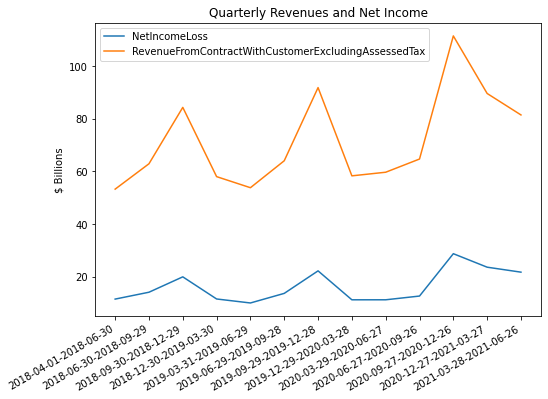

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import numpy as np

# custom y axis formatter
def format_dollars(y, pos=None):
    return int(y/1000000000)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = qrt_income_statement.astype(float)\
                         .loc["NetIncomeLoss"]\
                         .plot.line(legend=True)
ax = qrt_income_statement.astype(float)\
                         .loc["RevenueFromContractWithCustomerExcludingAssessedTax"]\
                         .plot.line(legend=True)

ax.set_title('Quarterly Revenues and Net Income')

ax.yaxis.set_major_formatter(tick.FuncFormatter(format_dollars))

plt.ylabel('$ Billions')

# show all quarter date ranges
plt.xticks(ticks=np.arange(len(qrt_income_statement.columns)),
           labels=qrt_income_statement.columns)

# format x axis properly
fig.autofmt_xdate()

plt.show()

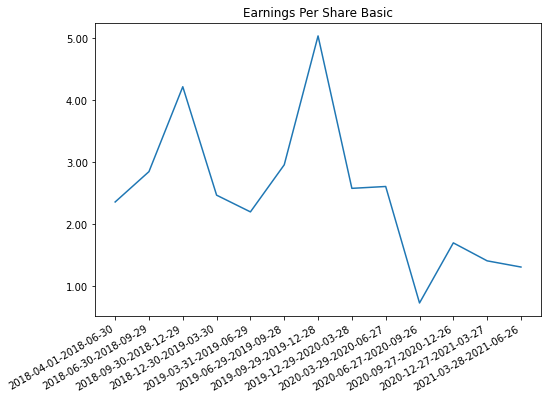

In [36]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(1, 1, figsize=(8, 6))

ax = qrt_income_statement.astype(float).loc["EarningsPerShareBasic"].plot.line()

ax.set_title('Earnings Per Share Basic')

# use higher precision for y axis labels
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.xticks(ticks=np.arange(len(qrt_income_statement.columns)),
           labels=qrt_income_statement.columns)

# format x axis properly
fig.autofmt_xdate()

plt.show()